<a href="https://colab.research.google.com/github/Dev2104/data-science/blob/main/Machine_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import io

In [ ]:

file_path = "Fragrance Dataset - COM7022 - [4037].csv"
df = pd.read_csv(file_path)


# Select numerical features for clustering
features = ['price', 'available', 'sold']
df_cluster = df[features].copy()


imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df_cluster), columns=features)

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

print("Data preprocessed, imputed, and scaled.")



Data preprocessed, imputed, and scaled.


 2. Running K-means Elbow Method 
Elbow plot saved to: kmeans_elbow_plot.png

K-Means clustering applied with k=5


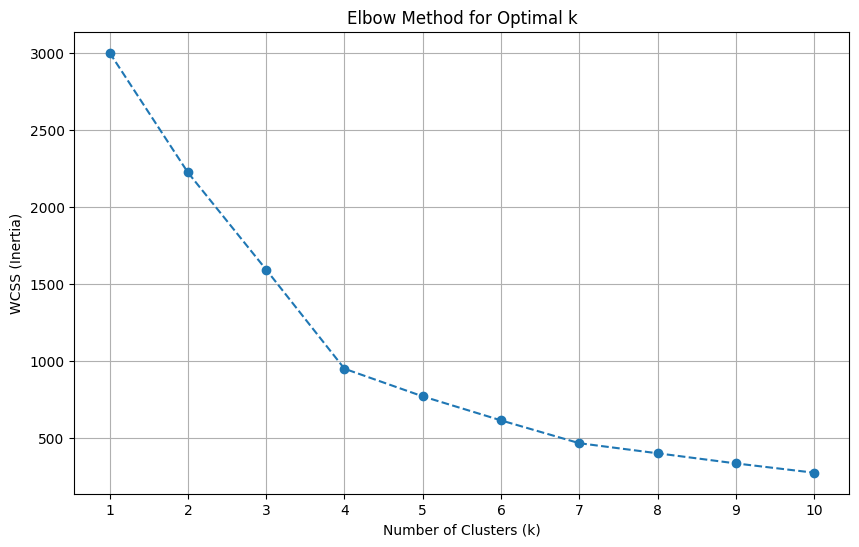

In [ ]:
print(" 2. Running K-means Elbow Method ")
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans_elbow = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans_elbow.fit(df_scaled)
    wcss.append(kmeans_elbow.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.xticks(k_range)

# Save the plot
elbow_plot_path = "kmeans_elbow_plot.png"
plt.savefig(elbow_plot_path)
print(f"Elbow plot saved to: {elbow_plot_path}")

# Applying K-Means with the chosen number of clusters
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
kmeans_labels = kmeans_final.fit_predict(df_scaled)

print(f"\nK-Means clustering applied with k={optimal_k}")

DBSCAN cluster plot saved to: dbscan_cluster_plot.png


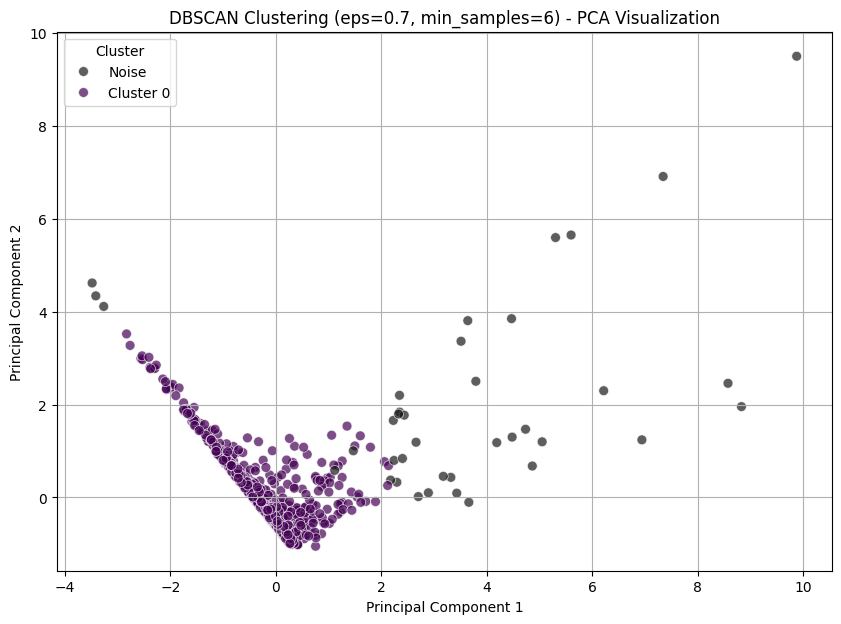

In [ ]:
try:

    # Parameters for DBSCAN
    dbscan_eps = 0.7
    dbscan_min_samples = 6

    # Applying DBSCAN
    dbscan = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
    dbscan_labels = dbscan.fit_predict(df_scaled)

    # Applying PCA to reduce data to 2D for plotting
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_scaled)

    # Create DataFrame for plotting
    df_pca_pd = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
    df_pca_pd['dbscan_cluster'] = dbscan_labels

    # Plot DBSCAN clusters
    plt.figure(figsize=(10, 7))

    unique_labels_db = sorted(set(dbscan_labels))
    n_clusters_dbscan = len(unique_labels_db) - (1 if -1 in unique_labels_db else 0)

    cluster_labels_db = sorted([l for l in unique_labels_db if l != -1])

    if n_clusters_dbscan > 0:
        cluster_colors = [plt.cm.viridis(x) for x in np.linspace(0, 1, n_clusters_dbscan)]
    else:
        cluster_colors = []

    palette = {-1: (0.1, 0.1, 0.1, 1.0)}
    palette.update({label: color for label, color in zip(cluster_labels_db, cluster_colors)})

    sns.scatterplot(x='PC1', y='PC2', hue='dbscan_cluster', data=df_pca_pd,
                    palette=palette, s=50, alpha=0.7)

    plt.title(f'DBSCAN Clustering (eps={dbscan_eps}, min_samples={dbscan_min_samples}) - PCA Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')


    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = ['Noise' if l == '-1' else f'Cluster {l}' for l in labels]
    plt.legend(handles=handles, labels=new_labels, title='Cluster')

    plt.grid(True)
    dbscan_plot_path = "dbscan_cluster_plot.png"
    plt.savefig(dbscan_plot_path)
    print(f"DBSCAN cluster plot saved to: {dbscan_plot_path}")

except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:

kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)


print(f"Silhouette Score (K-Means, k=4): {kmeans_silhouette:.4f}")
kmeans_db = davies_bouldin_score(df_scaled, kmeans_labels)
print("--------------------------------------------")
print(f"Davies-Bouldin Index (K-Means, k=4): {kmeans_db:.4f}")


Silhouette Score (K-Means, k=4): 0.4693
--------------------------------------------
Davies-Bouldin Index (K-Means, k=4): 0.6488
